<a href="https://colab.research.google.com/github/anuva05/PracticalDeepLearningCourse/blob/master/Lesson4_collaborative_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collaborative filtering example

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user.

In [0]:
from fastai.collab import *
from fastai.tabular import *

In [0]:
#this is what the dataframe for data for a collab model looks like
user,item,title = 'userId','movieId','title'

In [16]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [17]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:
#Let us create a model from the given data about movie ratings
data = CollabDataBunch.from_df(ratings, seed=42)

In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [21]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.635520,1.006525,00:00
1,0.846235,0.670781,00:00
2,0.647921,0.664761,00:00


#Movielens dataset

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [22]:
path=Config.data_path()/'ml-100k'
#uploaded the .zip dataset to Colab. Now unzip it
! unzip ml-100k.zip -d {path}



Archive:  ml-100k.zip
   creating: /root/.fastai/data/ml-100k/ml-100k/
  inflating: /root/.fastai/data/ml-100k/ml-100k/allbut.pl  
  inflating: /root/.fastai/data/ml-100k/ml-100k/mku.sh  
  inflating: /root/.fastai/data/ml-100k/ml-100k/README  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u.data  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u.genre  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u.info  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u.item  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u.occupation  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u.user  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u1.base  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u1.test  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u2.base  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u2.test  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u3.base  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u3.test  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u4.base  


In [23]:
! ls {path}/'ml-100k'


allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [0]:
#read with pandas
path= Config.data_path()/'ml-100k/ml-100k'

In [25]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [26]:
#There are 100k movie ratings
len(ratings)

6031

In [27]:
#group by movie
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,73,1097,4.0,1255504951,"Hate (Haine, La) (1995)"
1,102,1097,4.0,956600083,"Hate (Haine, La) (1995)"
2,665,1097,5.0,992909039,"Hate (Haine, La) (1995)"
3,157,1097,3.0,1291598808,"Hate (Haine, La) (1995)"
4,312,1097,3.0,959935483,"Hate (Haine, La) (1995)"


In [0]:
#Create data bunch object. valid_pct =0.1 means 10% of the dataset is chosen for validation?  
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

In [29]:
#Take a look at some of the data bunch objects
data.show_batch()

userId,title,target
468,Amityville: Dollhouse (1996),4.0
73,Purple Noon (1960),5.0
615,Guilty as Sin (1993),4.0
157,Heavyweights (1994),3.0
247,Stalingrad (1993),5.0


In [0]:
y_range=[0,5.5]

In [0]:
# Setup the learner
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

epoch,train_loss,valid_loss,time
0,1.972326,#na#,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


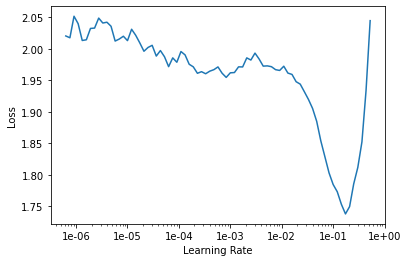

In [32]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [33]:
#Fit the model for 5 epochs with a learning rate of 5e-3
# which might work well, as seen from above graph
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,1.861606,1.649847,00:00
1,1.079325,0.569727,00:00
2,0.745793,0.569586,00:00
3,0.613785,0.569935,00:00
4,0.560025,0.568142,00:00


In [0]:
learn.save('dotprod')

[Some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91, which corresponds to an MSE of `0.91**2 = 0.83`.

# Using the model

In [0]:
learn.load('dotprod');

In [36]:
#Look at the model details. EmbeddingDotBias is a Pytorch model to find embeddings.
# It is a standard multi-layer perceptron without biases and one hidden layer
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(100, 40)
  (i_weight): Embedding(71, 40)
  (u_bias): Embedding(100, 1)
  (i_bias): Embedding(71, 1)
)

In [37]:
#These are some top rated movies
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Client, The (1994)', 'Life with Mikey (1993)', 'Promesse, La (1996)', 'Event Horizon (1997)',
       'North by Northwest (1959)', 'Stalingrad (1993)', 'Liebelei (1933)', 'Star Maps (1997)',
       'Savage Nights (Nuits fauves, Les) (1992)', "Schindler's List (1993)"], dtype=object)

#Movie bias

In [38]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([70])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [0]:
item0 = lambda o:o[0]

In [41]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.0758), 'Fish Called Wanda, A (1988)', 2.411111111111111),
 (tensor(-0.0606), 'Apostle, The (1997)', 2.6160714285714284),
 (tensor(-0.0446), 'Batman Returns (1992)', 2.836734693877551),
 (tensor(-0.0232), 'Clueless (1995)', 2.9545454545454546),
 (tensor(-0.0011), 'Fly Away Home (1996)', 3.189655172413793),
 (tensor(-0.0010), 'Terminal Velocity (1994)', 3.0357142857142856),
 (tensor(0.0014), 'Hour of the Pig, The (1993)', 3.0980392156862746),
 (tensor(0.0229), 'Dumb & Dumber (1994)', 3.2708333333333335),
 (tensor(0.0267), 'Liebelei (1933)', 3.4358974358974357),
 (tensor(0.0296), 'Shadowlands (1993)', 3.0673076923076925),
 (tensor(0.0309), 'Doom Generation, The (1995)', 3.443396226415094),
 (tensor(0.0405), 'Eraser (1996)', 3.309090909090909),
 (tensor(0.0425), 'Quiet Man, The (1952)', 3.3706896551724137),
 (tensor(0.0499), 'Mouse Hunt (1997)', 3.295918367346939),
 (tensor(0.0555), 'North by Northwest (1959)', 3.537974683544304)]

In [42]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.1759), 'Amityville: Dollhouse (1996)', 4.484848484848484),
 (tensor(0.1673), 'Family Thing, A (1996)', 4.241666666666666),
 (tensor(0.1636), 'Ghosts of Mississippi (1996)', 4.2063492063492065),
 (tensor(0.1626), 'Don Juan DeMarco (1995)', 4.285714285714286),
 (tensor(0.1601), 'Wild Bunch, The (1969)', 3.962121212121212),
 (tensor(0.1600), 'Promesse, La (1996)', 4.475609756097561),
 (tensor(0.1583), "Schindler's List (1993)", 4.331081081081081),
 (tensor(0.1565), 'Stalingrad (1993)', 4.177215189873418),
 (tensor(0.1558), 'Gandhi (1982)', 4.2890625),
 (tensor(0.1558), 'Virtuosity (1995)', 4.176056338028169),
 (tensor(0.1551),
  'Savage Nights (Nuits fauves, Les) (1992)',
  4.2727272727272725),
 (tensor(0.1520), 'Spellbound (1945)', 4.1716417910447765),
 (tensor(0.1487), 'Fan, The (1996)', 3.92),
 (tensor(0.1468), 'Event Horizon (1997)', 4.25625),
 (tensor(0.1467), 'Guilty as Sin (1993)', 4.241666666666666)]

### Movie weights

In [43]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([70, 40])

In [44]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([70, 3])

In [0]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [46]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.9660), 'Promesse, La (1996)'),
 (tensor(0.8702), 'Amityville: Dollhouse (1996)'),
 (tensor(0.8587), 'When a Man Loves a Woman (1994)'),
 (tensor(0.6471), "Schindler's List (1993)"),
 (tensor(0.6331), 'Don Juan DeMarco (1995)'),
 (tensor(0.6295), 'Star Wars (1977)'),
 (tensor(0.5864), 'Guilty as Sin (1993)'),
 (tensor(0.5587), 'Ghosts of Mississippi (1996)'),
 (tensor(0.5574), 'Spellbound (1945)'),
 (tensor(0.5468), 'Before the Rain (Pred dozhdot) (1994)')]

In [47]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.0755), 'Fish Called Wanda, A (1988)'),
 (tensor(-0.9849), 'Apostle, The (1997)'),
 (tensor(-0.7468), 'Batman Returns (1992)'),
 (tensor(-0.7373), 'Clueless (1995)'),
 (tensor(-0.7134), 'Terminal Velocity (1994)'),
 (tensor(-0.7047), 'Shadowlands (1993)'),
 (tensor(-0.6710), 'Dumb & Dumber (1994)'),
 (tensor(-0.6154), 'Fly Away Home (1996)'),
 (tensor(-0.5796), 'Eraser (1996)'),
 (tensor(-0.5588), 'Hour of the Pig, The (1993)')]

In [0]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [49]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.4409), 'White Squall (1996)'),
 (tensor(0.4063), 'Amos & Andrew (1993)'),
 (tensor(0.3489), "One Flew Over the Cuckoo's Nest (1975)"),
 (tensor(0.2854), 'Spellbound (1945)'),
 (tensor(0.2517), 'Don Juan DeMarco (1995)'),
 (tensor(0.2458), 'Strange Days (1995)'),
 (tensor(0.2385), 'Speed 2: Cruise Control (1997)'),
 (tensor(0.2237), 'Shallow Grave (1994)'),
 (tensor(0.2130), 'Mortal Kombat (1995)'),
 (tensor(0.2116), 'Ed Wood (1994)')]

In [50]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.3879), 'Savage Nights (Nuits fauves, Les) (1992)'),
 (tensor(-0.3555), 'Event Horizon (1997)'),
 (tensor(-0.3403), 'Virtuosity (1995)'),
 (tensor(-0.3115), 'Dumb & Dumber (1994)'),
 (tensor(-0.2771), 'When a Man Loves a Woman (1994)'),
 (tensor(-0.2762), 'Go Fish (1994)'),
 (tensor(-0.2697), 'Liebelei (1933)'),
 (tensor(-0.2692), 'Purple Noon (1960)'),
 (tensor(-0.2559), 'Beauty and the Beast (1991)'),
 (tensor(-0.2395), 'Heavyweights (1994)')]

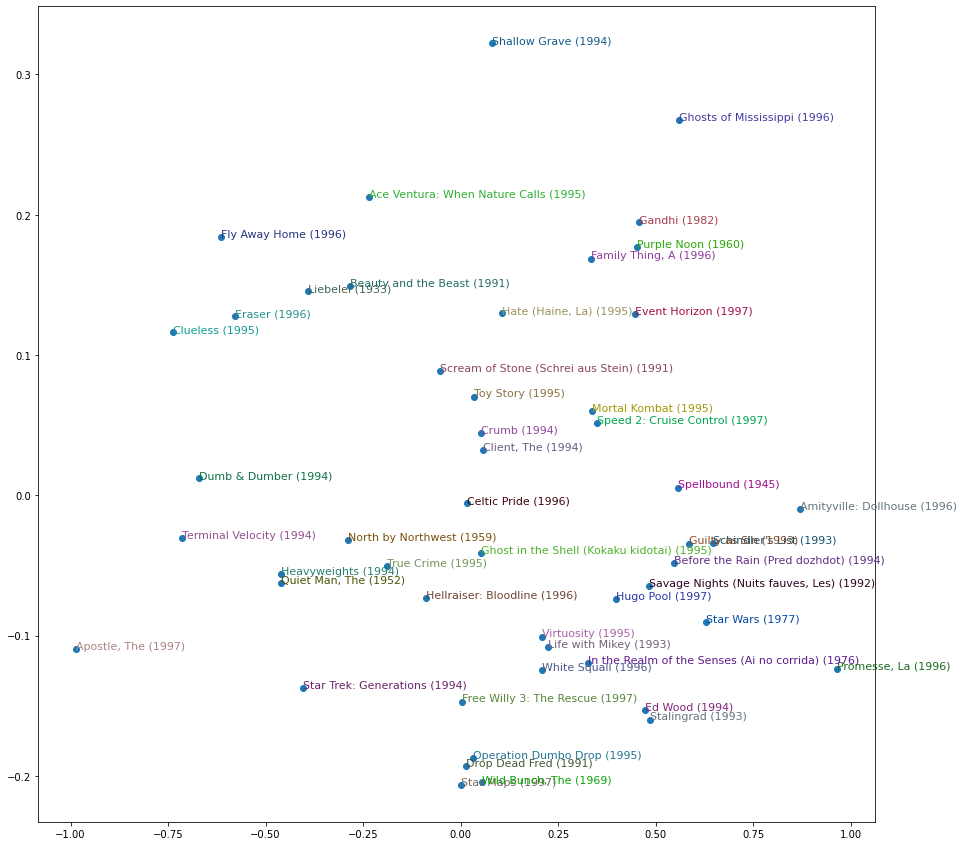

In [51]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()